# Introducción a la programación estadística <br/> con Python y Pandas (...)
----

## Herramientas que usaremos

* [Python](https://www.python.org/downloads/)

* [Pandas](http://pandas.pydata.org/)
    Libreria que provee simples pero poderosas estructuras y herramientas para el analisis de datos
* [Jupyter Notebook](http://jupyter.org/)
    Ambiente web para la creacion de documentos interactivos con elementos de programacion y datos (Python es solo uno de los multiples lenguajes que soporta)
* [NumPy](http://www.numpy.org/)
    Libreria base que provee estructuras de datos optimizadas (fast! fast! fast!) para el analisis (arreglo multidimensional: Ndarray)
* matplotlib
    Libreria base de visualización
* [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/)
    Libreria para visualizacion estadistica, construida sobre matplotlib para ser mucho mas facil de usar y amigable
* todo lo anterior se consigue con solo instalar [Anaconda](https://www.continuum.io/downloads) (_la_ distribución de Python más popular)
* dos o tres cositas mas...

## Cosas que no veremos

* la historia de Python
* ni las razones para usarlo
* tampoco veremos el millon de cosas que se pueden hacer con Python y su ecosistema
* detalles tecnicos como instalacion/configuracion, 
* conceptos de programacion/implementación "avanzados" (_les pasaremos por arribita si es necesario_)

# Que si veremos?

Pues cómo:

* importar datos de un archivo (csv)
* ver la estructura básica de los datos
* realizar un minímo de limpieza y orden:
    * Transformar campos
    * Agregar nuevos campos
* acceder al contenido de:
    * columnas especificas
    * registros especificos
* calcular estadisticas descriptivas
    * Rango, media, desviación estandar
    * Cuantiles
    * resumen de 7 números
* explorar subdivisiones de los datos
    * group by
    * split-apply-combine
* generar algunos graficos
    * Histograma
    * Diagrama de caja

...y uno que otro extra, _si da tiempo..._


## Pero con cuáles datos?

Un archivo de la Nómina Mensual de la DGII en Febrero y Enero 2016 que yo tome del repositorio de datos abiertos del gobierno de Republica Dominicana (http://datos.gob.do/dataset/nomina-de-empleados-dgii-2016) hace ya más de un año....

#### Y que al parecer ya no está disponible en el portal datos.gob.do ni en la página de la DGII

### Importemos la libreria pandas con el alias pd (por convencion)

In [1]:
import pandas as pd

### Cargamos el archivo a un [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html) en memoria

El archivo es separado por ';'.

Asi como read_csv, existen funciones para leer:
* excel
* SAS
* STATA
* archivos de longitud fija
* JSON, entre otros...

In [2]:
# DataFrame cariñosamente df
df = pd.read_csv('cs_DGII_Nomina_2016.csv',sep=';', encoding="ISO-8859-1") # encoding???

### Demos un vistazo a los primeros 5 registros

In [3]:
df.head()

,Empleado,Salario,Mes,Puesto,Genero
0,JOANNY DEL CARMEN ACEVEDO MEDINA,"50,277.00",feb-16,Comprador(a),F
1,JOANNY DEL CARMEN ACEVEDO MEDINA,"50,277.00",ene-16,Comprador(a),F
2,EFRAIN EVANGELISTA DIAZ,"63,500.00",feb-16,Coordinador(a) Compras,M
3,EFRAIN EVANGELISTA DIAZ,"63,500.00",ene-16,Coordinador(a) Compras,M
4,JOHANNY DEL CARMEN RAMIREZ ROBLES,"50,277.00",feb-16,Comprador(a),F


### y a los ultimos 10

In [4]:
df.tail(10)

,Empleado,Salario,Mes,Puesto,Genero
5406,ANA MARIA BONCI PEREZ DE RAMIREZ,"19,050.00",feb-16,Cajero(a) C,F
5407,ANA MARIA BONCI PEREZ DE RAMIREZ,"10,795.00",ene-16,Cajero(a) C,F
5408,MARIELA DEL CARMEN CEBALLOS PEÑA,"38,449.00",feb-16,Oficial Gestión Deudas,F
5409,MARIELA DEL CARMEN CEBALLOS PEÑA,"21,787.77",ene-16,Oficial Gestión Deudas,F
5410,NABIL JOSEFINA CANDELARIA FELICIANO,"24,493.00",feb-16,Secretaria B,F
5411,VÍCTOR HICIANO MATÍAS,"18,529.00",feb-16,Tasador(a),M
5412,PAMELA NIEVE RODRIGUEZ PIMENTEL,"12,393.00",feb-16,Asistente Administrativo(a),F
5413,MARIA MILQUELLA BAEZ BAEZ,"5,679.00",feb-16,Conserje,F
5414,HENRY MANUEL ARTHUR NARDI,"8,584.00",feb-16,Auxiliar Proyecto Motocicletas,M
5415,MARIA LUISA HERNANDEZ ASENCIO,"8,584.00",feb-16,Auxiliar Proyecto Motocicletas,F


### Que tamaño tiene nuestro DataFrame?

In [5]:
df.shape

(5416, 5)

### En español?

5,416 registros y 5 columnas

### Nuestro DataFrame _parece_ una tabla o una hoja de cálculo...

Cada registro tiene un indice (hasta ahora numerico y autoasignado), cada columna tiene nombre y un tipo de datos...

...parecen no necesitar mucha explicación. Aún así veamos que nos dice Pandas:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 5 columns):
Empleado     5416 non-null object
 Salario     5416 non-null object
Mes          5416 non-null object
Puesto       5416 non-null object
Genero       5416 non-null object
dtypes: object(5)
memory usage: 211.6+ KB


## Limpieza de data

### Valores faltantes o nulos

El conteo de cada columna y el tipo nos sugiere que no hay valores faltantes. Pero, vamos a confirmarlo:

In [7]:
df.isnull().any()

Empleado     False
 Salario     False
Mes          False
Puesto       False
Genero       False
dtype: bool

### Normalizar o limpiar los nombres de las columnas

El DataFrame tiene una propiedad _columns_ que es (_como_) una lista de los nombres de las columnas.

In [8]:
df.columns

Index(['Empleado', ' Salario ', 'Mes', 'Puesto', 'Genero'], dtype='object')

La columna Salario parece tener un espacio de mas. Esto nos importa porque por comodidad queremos acceder a los valores de cada columna haciendo algo como:

In [9]:
df.Mes.head()

0    feb-16
1    ene-16
2    feb-16
3    ene-16
4    feb-16
Name: Mes, dtype: object

Arreglemos eso de una forma que se asegure que todos los nombres de columnas esten "limpios". Para eso:

* iteramos por cada columna e invocamos funciones propias del tipo de dato _string_ para limpiarlos (gracias Python)
* usamos strip para quitar espacios delante y detras
* y finalmente lower para convertir todo a minusculas

In [10]:
df.columns = [x.strip().lower() for x in df.columns.values]
df.columns

Index(['empleado', 'salario', 'mes', 'puesto', 'genero'], dtype='object')

Ahora todas las columnas tienen nombres sencillos, faciles de utilizar.

### Salarios _limpios_

In [11]:
df.salario.head()

0     50,277.00 
1     50,277.00 
2     63,500.00 
3     63,500.00 
4     50,277.00 
Name: salario, dtype: object

La columna salario tiene un tipo de dato _object_. Esto normalmente se refiere a texto libre. Para nuestro analisis necesitamos interpretar los valores como números.

Con la función _apply_ le aplicamos una operación a cada valor de la columna. En este caso usamos un _lambda_ (o _funcion anonima_) para:
* quitar las comas y los espacios en blanco (replace y strip)
* convertir a número (to_numeric)

In [12]:
limpiar_salario = lambda x: pd.to_numeric(x.replace(',','').strip(), errors='coerce')
df.salario = df.salario.apply(limpiar_salario)

Veamos como quedo:

In [13]:
df.salario.head()

0    50277.0
1    50277.0
2    63500.0
3    63500.0
4    50277.0
Name: salario, dtype: float64

### Resumen de 7 números

Habiendo realizado la conversión podemos ver estadísticas descriptivas básicas (_por fin!_) de los salarios.

In [14]:
df.salario.describe()

count      5416.000000
mean      43711.412602
std       30802.706133
min        3502.070000
25%       24343.000000
50%       38946.000000
75%       51556.000000
max      559600.000000
Name: salario, dtype: float64

### Limpie su _puesto_

In [15]:
df.puesto.describe()

count         5416
unique         271
top       Conserje
freq           289
Name: puesto, dtype: object

*271* puestos diferentes? Vamos a asegurarnos que no se abulte esta cantidad debido a que un mismo puesto este escrito con espacios de más como paso con la columna _Salario_ (o sin acentos).

Para esto necesitaremos uno que otro truco cuya explicación escapa al alcance de la presentación (_pero_ que puede ser replicada con un poco de [stackoverflow](http://stackoverflow.com/))

Brevemente:
* definimos una funcion *limpiar\_puesto* donde
    * usamos _unidecode_ para que nos ayude a quitar los acentos
    * usamos _re_ para con una expresión regular quitar los fragmentos entre parentesis de los puestos
    * usamos _translate_ para quitar puntos y comas no deseados
* le aplicamos esta funcion a los datos de la columna _puesto_ para crear una nueva columna *puesto\_clean*

In [16]:
from unidecode import unidecode
import re

def limpiar_puesto(pstr):
    pstr = unidecode(pstr).strip().lower()
    pstr = re.sub('\(.*?\)','', pstr)
    pstr = pstr.translate({ord('.'): None, ord(','): None})
    return pstr

In [17]:
# tambien podemos acceder a las columnas con esta notación df['columna']
df['puesto_clean'] = df.puesto.apply(limpiar_puesto)
df.puesto_clean.describe()

count         5416
unique         269
top       conserje
freq           289
Name: puesto_clean, dtype: object

Oh sorpresa! Ahora son _269_ puestos en lugar de _271_.

*Se deja de ejercicio al interesado averiguar cuales valores fueron eliminados*

### Todos los generos son limpios

In [18]:
df.genero.value_counts()

F    3198
M    2218
Name: genero, dtype: int64

In [19]:
df.genero.describe()

count     5416
unique       2
top          F
freq      3198
Name: genero, dtype: object

### Y los meses tambien

In [20]:
df.mes.value_counts()

feb-16    2713
ene-16    2703
Name: mes, dtype: int64

In [21]:
df.mes.describe()

count       5416
unique         2
top       feb-16
freq        2713
Name: mes, dtype: object

## Empezar a explorar un poco

### Filtrar y seleccionar data

Separemos la nomina de cada mes disponible.

In [22]:
ene = df[df.mes == 'ene-16']
feb = df[df.mes == 'feb-16']
print(ene.shape)
print(feb.shape)

(2703, 6)
(2713, 6)


### High-rollers

Veamos las posiciones de _grandes_ salarios. Filtramos con una condicion y seleccionamos las columnas que nos interesan:

In [23]:
ene[ene.salario > 250000][['puesto_clean','salario','genero']]

,puesto_clean,salario,genero
1596,subdirector fiscalizacion,339730.0,M
1598,subdirector juridica,339730.0,M
4543,director general,559600.0,M
4547,subdirectora de planificacion y desarrollo,339730.0,F
4553,subdirector recaudacion,339730.0,M


Si se seleccionamos las columnas y despues filtramos, tambien funciona?

In [24]:
ene[['puesto_clean','salario','genero']][ene.salario > 250000]

,puesto_clean,salario,genero
1596,subdirector fiscalizacion,339730.0,M
1598,subdirector juridica,339730.0,M
4543,director general,559600.0,M
4547,subdirectora de planificacion y desarrollo,339730.0,F
4553,subdirector recaudacion,339730.0,M


Por que?

In [25]:
(ene.salario > 250000).head()

1    False
3    False
5    False
7    False
9    False
Name: salario, dtype: bool

Resulta que la condicion devuelve una [serie](http://pandas.pydata.org/pandas-docs/stable/dsintro.html) de booleanos indicando cuales registros cumplen con la condicion.

### Agrupar data (Group By)

Agrupar o separar los datos según los valores de una columna es el primer paso, conocido como _split_, de patrón [_split-apply-combine_](https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby) que veremos de manera natural aquí.

In [26]:
por_mes = df.groupby(by='mes')
por_mes

_groupby_ nos da un colección que relaciona el nombre de cada grupo con la parte de la data que pertenece a dicho grupo.

In [27]:
for mes, data_mes in por_mes:
    print(mes, data_mes.shape)

ene-16 (2703, 6)
feb-16 (2713, 6)


Pero tambien nos permite hacerle preguntas a los distintos grupos a la vez. En efecto llevando a cabo los pasos:

* *split* : separar los datos por el mes al que pertenecen
* *apply* : a cada grupo formado _aplicarle_ la operación _describe_
* *combine* : tomar los resultados y _combinarlos_ en una nueva tabla resultado

Todo esto, en un simple línea de código:

In [28]:
por_mes.salario.describe()

,count,mean,std,min,25%,50%,75%,max
mes,,,,,,,,
ene-16,2703.0,43661.817984,30818.804953,3502.07,24057.5,38946.0,51556.0,559600.0
feb-16,2713.0,43760.824416,30792.260238,5679.00,24343.0,39045.0,51556.0,559600.0


Podemos agrupar por cualquier numero de columnas que querramos, formando una jerarquia de profundidad arbitraria.

In [29]:
df.groupby(by=['mes','genero']).salario.describe()

count          mean           std      min      25%      50%  \
mes    genero                                                                  
ene-16 F       1598.0  44691.762766  27254.121784  4838.13  28726.0  42333.0   
       M       1105.0  42172.359376  35303.786981  3502.07  20410.0  34774.0   
feb-16 F       1600.0  44827.896875  27224.643133  5679.00  28726.0  42333.0   
       M       1113.0  42226.847835  35251.273038  5722.67  20410.0  34774.0   

                   75%       max  
mes    genero                     
ene-16 F       53280.0  339730.0  
       M       51556.0  559600.0  
feb-16 F       53280.0  339730.0  
       M       51556.0  559600.0

#### Proporción de la empleomanía por genero

Podemos realizar varios pasos tipo _apply_ en hilo, inclusive con operaciones arbitrarias (funciones anonimas o lambdas)

In [30]:
feb_por_gen = feb.groupby(by='genero')
total_empleados = feb.salario.count()
feb_por_gen.salario.count().apply(lambda x: x/total_empleados)

genero
F    0.589753
M    0.410247
Name: salario, dtype: float64

#### Proporción de la nomina por genero

In [31]:
total_nomina = feb.salario.sum()
feb_por_gen.salario.sum().apply(lambda x: x/total_nomina)

genero
F    0.604134
M    0.395866
Name: salario, dtype: float64

Se fijaron bien?

Las mujeres son el 58.97% de la empleomanía y el 60.41% de la nómina. Mientras que los hombres son el 41.02% de la empleomanía y el 39.59% de la nómina.

Hmmm...

## A graficar un poco

Resulta que con Pandas, podemos continuar el hilo de _apply_ y convertir la tabla en un grafico de barra muy facilmente. En este caso, la proporción de la nómina asignada a hombres y mujeres.

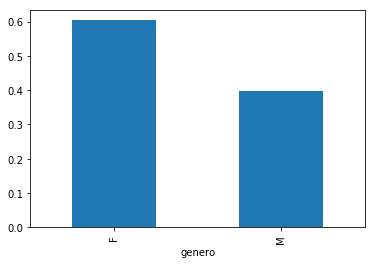

In [32]:
# esto es para que genere los graficos aqui dentro
%matplotlib inline
feb_por_gen.salario.sum().apply(lambda x: x/total_nomina).plot(kind='bar')

### Mejoremos el look un poco con Seaborn

![seaborn](https://i.pinimg.com/originals/b0/7a/b4/b07ab4194579b7359bb7f639b87729ae.jpg)

La libreria de visualización [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) es:
* muy popular
* facil de usar
* mas _inteligente_
* se ve mas bonita por defecto que _matplotlib_ (tan solo importarla cambia el estilo y colores de los graficos generados)


### Diagrama de frecuencia de empleados mujeres y hombres

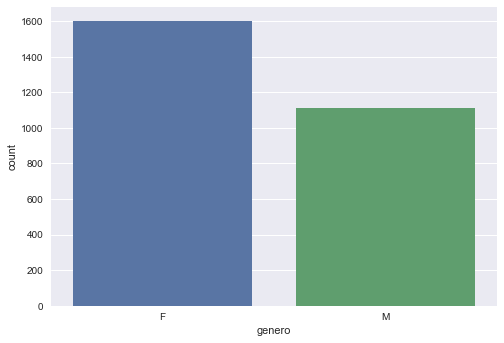

In [33]:
import seaborn as sns
sns.countplot(x='genero',data=feb)

### Proporción de la nómina asignada a mujeres y hombres (reloaded)
Aquí vemos como el estilo del gráfico cambio solo por importar Seaborn. A mi me parece más bonito.

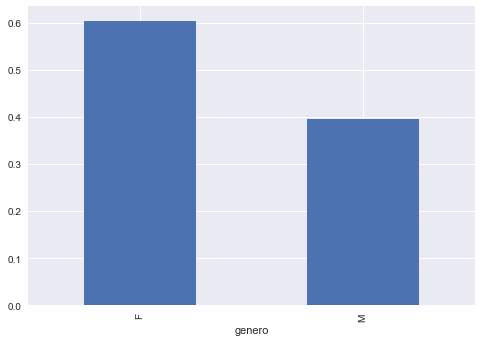

In [34]:
feb_por_gen.salario.sum().apply(lambda x: x/total_nomina).plot(kind='bar')

## Histogramas del Salario

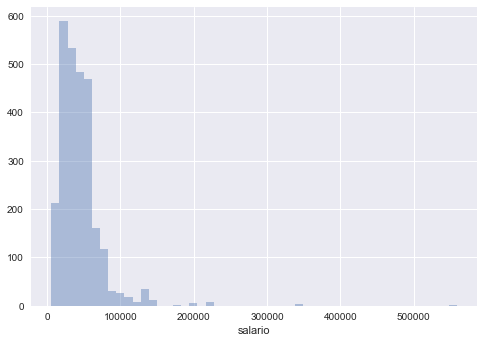

In [35]:
sns.distplot(feb.salario, kde=False)

### Histograma por genero (lado a lado)

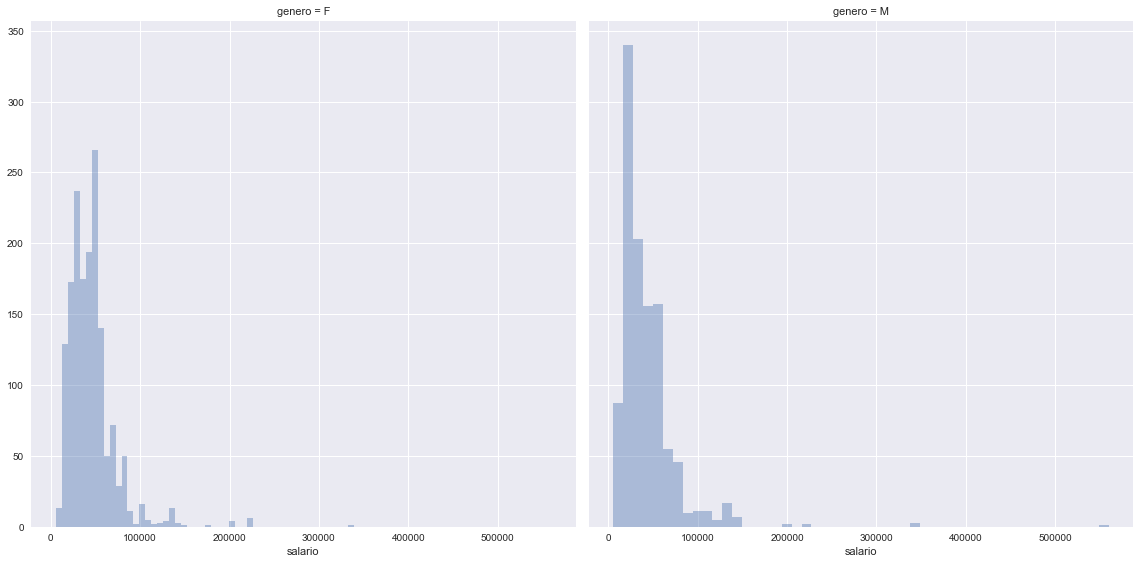

In [36]:
sns.FacetGrid(data=feb, col='genero', size=8).map(sns.distplot,'salario', kde=False)

### Diagrama de cajas (box & whiskers)

![boxplot](http://www.datavizcatalogue.com/methods/images/anatomy/box_plot.png)

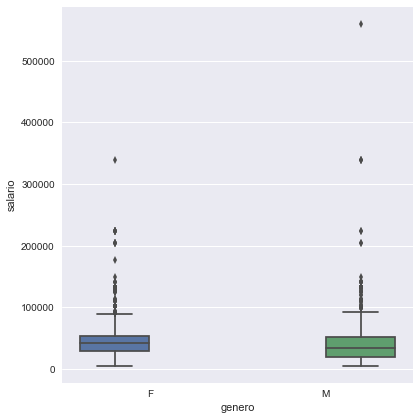

In [77]:
sns.factorplot(data=feb, x='genero',y='salario',hue='genero', kind='box',size=6)

### Una tangente (a)normal

Cómo se vería una distribución normal (gaussiana) si tuviera la media y desviación que vemos empíricamente en los datos?

Seaborn y Numpy al rescate!

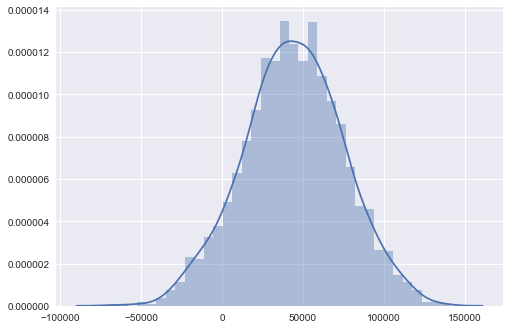

In [38]:
import numpy as np
sns.distplot(np.random.normal(feb.salario.mean(),feb.salario.std(),feb.shape[0]))

## Empecemos a enfocar nuestra exploración

#### Diference entre salario promedio por genero

In [39]:
feb_por_gen.salario.mean()

genero
F    44827.896875
M    42226.847835
Name: salario, dtype: float64

In [40]:
salario_promedio_f, salario_promedio_m = feb_por_gen.salario.mean()[['F','M']]
salario_promedio_f - salario_promedio_m

2601.0490403189542

Parece ser que el salario promedio de las mujeres _supero_ en *2601.05 DOP* al de los hombres...

### Relacion salario mujeres y hombres

In [41]:
salario_promedio_f/salario_promedio_m

1.061597044858809

In [42]:
(salario_promedio_f/salario_promedio_m - 1)*100

6.1597044858809014

Sin controlar por ningun otro factor: en febrero de 2016 en la DGII, las mujeres en promedio ganaron aprox. 2601.05 DOP más que los hombres. El equivalente a un 6.16% más aprox.

Esto va en la misma linea que lo sugerido por las estadisticas publicas mencionadas [aqui](http://www2.deloitte.com/do/es/pages/finance/topics/grafico-semana/mujeres-siguen-ganando-mas.html) por Deloitte.

![Diferencia salarial por genero](160112-do-fas-salario-cotizable.png)

### Que pasa cuando miramos los grupos que menos ganan?

In [43]:
bottom25 = feb[feb.salario <= feb.salario.quantile(.25)]
bottom25_by_gender = bottom25.groupby(by='genero')
bottom25_by_gender.salario.describe()

,count,mean,std,min,25%,50%,75%,max
genero,,,,,,,,
F,312.0,17443.849359,4122.426443,5679.00,12620.0,20342.0,20410.0,24343.0
M,383.0,18227.821514,3018.836078,5722.67,17291.0,18871.0,20410.0,24343.0


In [44]:
bottom25_by_gender.salario.mean()['F'] - bottom25_by_gender.salario.mean()['M']

-783.97215538595265

In [45]:
(bottom25_by_gender.salario.mean()['F']/bottom25_by_gender.salario.mean()['M'] - 1) * 100

-4.3009646257964551

En el primer cuartil de salarios la mujer promedio gano 4.30% (783.97 DOP) *menos* que el hombre promedio.

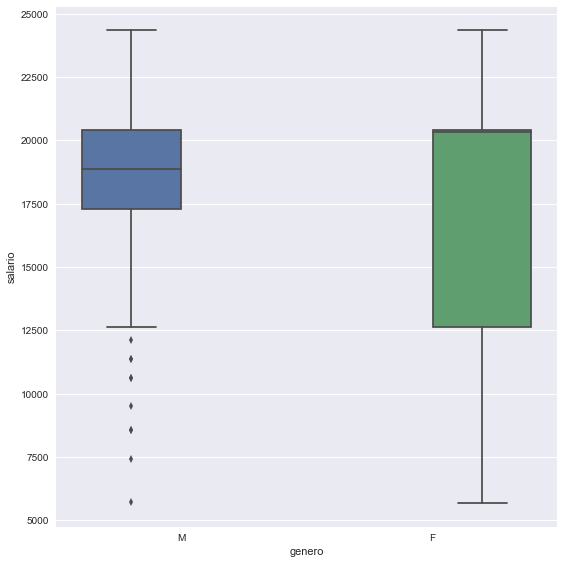

In [46]:
sns.factorplot(data=bottom25, x='genero',y='salario',hue='genero', kind='box',size=8)

### Que pasa cuando miramos los grupos que mas ganan?

In [47]:
top25 = feb[feb.salario >= feb.salario.quantile(.75)]
top25_by_gender = top25.groupby(by='genero')
top25_by_gender.salario.describe()

,count,mean,std,min,25%,50%,75%,max
genero,,,,,,,,
F,463.0,73666.892009,32255.190131,51556.0,55304.0,63195.0,80037.0,339730.0
M,289.0,80961.093426,48936.807545,51556.0,55304.0,65411.0,83154.0,559600.0


In [48]:
top25_by_gender.salario.mean()['F'] - top25_by_gender.salario.mean()['M']

-7294.2014169662289

In [49]:
(top25_by_gender.salario.mean()['F']/top25_by_gender.salario.mean()['M'] - 1) * 100

-9.009514457297696

En el ultimo cuartil la mujer promedio gano 9% (7294.20 DOP) menos que el hombre promedio. Pero, notan algo _extraño_?

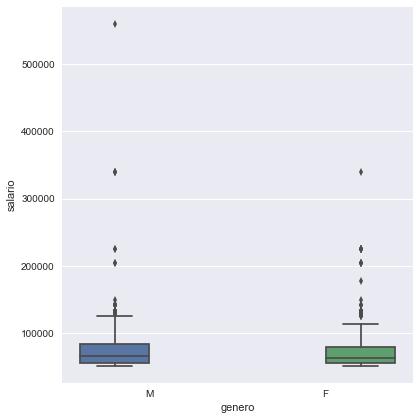

In [70]:
sns.factorplot(data=top25, x='genero',y='salario',hue='genero', kind='box',size=6)

### Cual es el impacto de la persona que mas gana en la diferencia?
_Outliers o valores extremos_

In [51]:
trunc_top25 = feb[(feb.salario >= feb.salario.quantile(.75)) & (feb.salario < feb.salario.max())]
trunc_top25_by_gender = trunc_top25.groupby(by='genero')
trunc_top25_by_gender.salario.describe()

,count,mean,std,min,25%,50%,75%,max
genero,,,,,,,,
F,463.0,73666.892009,32255.190131,51556.0,55304.0,63195.0,80037.0,339730.0
M,288.0,79299.152778,40026.773874,51556.0,55304.0,65367.5,83154.0,339730.0


In [52]:
trunc_top25_by_gender.salario.mean()['F'] - trunc_top25_by_gender.salario.mean()['M']

-5632.2607691384765

In [53]:
(trunc_top25_by_gender.salario.mean()['F']/trunc_top25_by_gender.salario.mean()['M'] - 1) * 100

-7.1025484785719133

Ahora la diferencia se redujo a 7.10% (5,632.26 DOP) menos en salario promedio para las mujeres que los hombres.

En este caso, a manera ilustrativa, consideramos que el salario más alto dista demasiado de los demás y su influencia distorsiona lo que queremos evaluar.

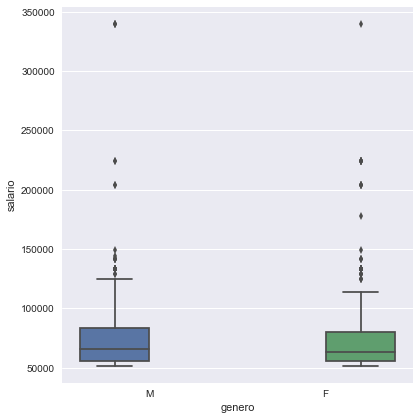

In [71]:
sns.factorplot(data=trunc_top25, x='genero',y='salario',hue='genero', kind='box',size=6)

### Profundicemos de cuartiles a deciles

Veamos el comportamiento del salario promedio por genero para cada decil. Para eso necesitaremos:

* importar a Numpy, solo para usar una funcion de promedio
* crear una columna nueva que asigne cada record a un decil
* Pivot Table! (igualito que en Excel)

In [55]:
pd.set_option('mode.chained_assignment',None) # incantacion arcana que podemos ignorar por ahora
feb['salario_bin'] = pd.qcut(feb.salario,10,precision=0)
# guardemos esto para graficarlo mas abajo
epg_mean = pd.pivot_table(data=feb,index=['salario_bin'],columns=['genero'],values='salario',aggfunc=np.mean)
epg_mean

genero,F,M
salario_bin,,
"(5678.0, 17297.0]",12907.755725,15289.402237
"(17297.0, 20410.0]",20099.305085,19649.266304
"(20410.0, 28481.0]",24841.780142,24471.835106
"(28481.0, 33211.0]",30483.116022,29991.347368
"(33211.0, 39045.0]",35948.711538,35862.598131
"(39045.0, 45287.0]",42669.728324,42419.706422
"(45287.0, 50277.0]",48684.388889,48803.554217
"(50277.0, 55304.0]",53549.025806,53348.610390
"(55304.0, 70050.0]",64315.873418,63010.273684


### Graficamente es mas bonito

Seaborn es esteticamente más agradable y suele ahorrar mucho trabajo, los gráficos de Pandas se consiguen de la manera más facil; pero a veces es necesario modificar detalles que requieren usar _matplotlib_ directamente.

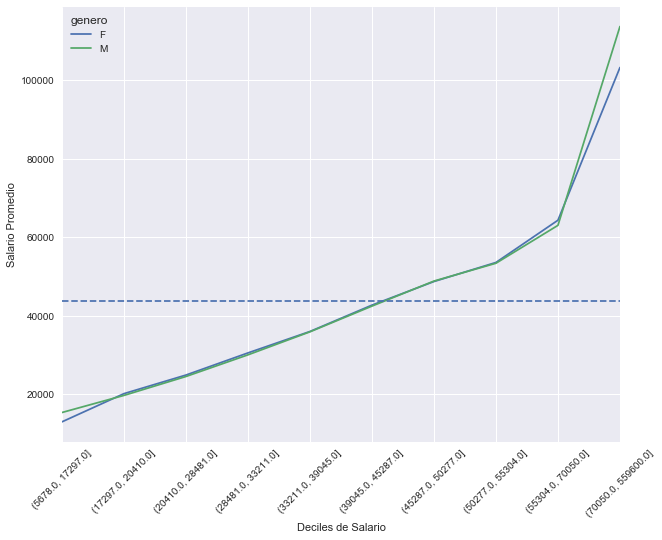

In [68]:
from matplotlib import pyplot as plt
# Pandas nos genera el grafico inicial
ax = epg_mean.plot(grid=True,figsize=(10,8))
# Pero con matplotlib modificamos los nombres, las unidades y marcas de los ejes
ax.set_xlabel('Deciles de Salario')
ax.set_ylabel('Salario Promedio')
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# Finalmente agregemos el promedio general como linea punteada para referencia
plt.axhline(feb.salario.mean(),linestyle='dashed')

Soy yo a las líneas están superpuestas en todos los deciles excepto el primero y el último?

## Mismo trabajo = mismo sueldo?

Hasta ahora hemos estado mirando la nómina total, por género y por decil pero sin importar la posición.

Realmente es justo comparar los salarios entre diferentes puestos?

Miremos solamente los puestos que tienen _20+_ empleados y por lo menos un hombre y una mujer (otro _split-apply-combine_)

In [57]:
spg = feb.groupby(by=['puesto_clean']).filter(\
                                              lambda x: \
                                              len(x) > 19 and \
                                                  len(x[x.genero == 'F']) > 0 and \
                                                  len(x[x.genero == 'M']) > 0)
print(spg.shape[0])

1451


### Cuales puestos quedaron?
Y cuantos empleados hay en cada uno?

In [75]:
spg.puesto_clean.nunique()

35

In [58]:
spg.puesto_clean.value_counts()

conserje                                            145
oficial ctrl contrib a                               80
auditor interno a                                    70
tasador                                              63
oficial ctrl contrib c                               57
encargado unidad c                                   57
encargado seccion                                    54
auxiliar archivo                                     52
auditor externo c                                    50
auxiliar informacion y atencion al contribuyente     49
analista                                             49
auditor interno c                                    48
auxiliar                                             47
auditor externo b                                    46
oficial de gestion de fiscalizacion                  40
abogado b                                            36
oficial ctrl contrib b                               35
tec gestion servicios b                         

### Cómo se ve el salario en general por género de esta subpoblación?

In [59]:
spg.groupby(by='genero').salario.describe()

,count,mean,std,min,25%,50%,75%,max
genero,,,,,,,,
F,965.0,41110.240415,19763.665247,5679.0,24492.0,42333.0,50277.0,113392.0
M,486.0,38188.174897,19130.732739,9525.0,20410.0,37662.5,49815.0,113392.0


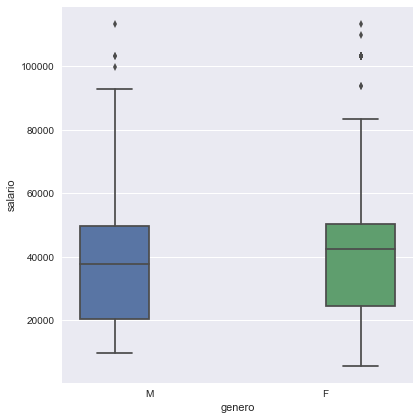

In [72]:
sns.factorplot(data=spg, x='genero',y='salario',hue='genero', kind='box',size=6)

### Y el salario para cada puesto por género?

Veamos los puestos ordenado de menor a mayor por el salario promedio de las mujeres que los ocupan.

In [61]:
spg_mean_pivot = pd.pivot_table(data=spg,values='salario',index=['puesto_clean'],columns=['genero'],aggfunc=np.mean)
spg_mean_pivot.sort_values('F',inplace=True)
spg_mean_pivot.head(10)

genero,F,M
puesto_clean,,
conserje,12759.649123,12601.838710
mensajero interno,15697.000000,16262.700000
auxiliar informacion y atencion al contribuyente,20218.342857,19607.214286
auxiliar de correspondencia,20253.076923,19258.846154
tecnico digitalizador,20338.250000,20445.888889
auxiliar archivo,20756.291667,20877.178571
auxiliar,21576.687500,20327.225806
cajero digitador,23392.058824,21373.700000
digitador,24268.000000,22171.142857


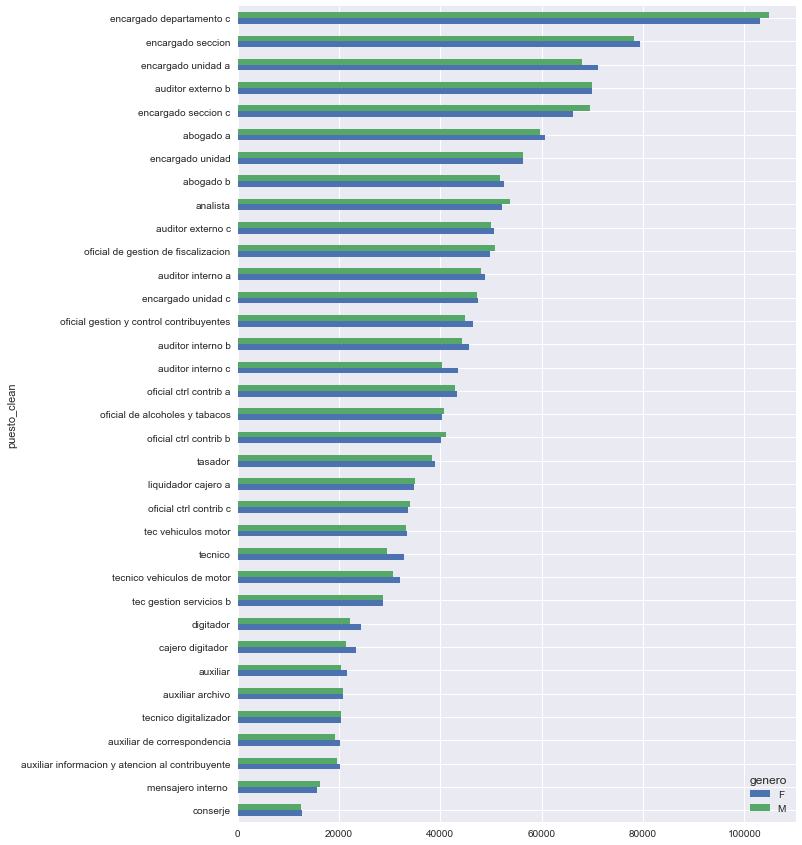

In [62]:
spg_mean_pivot.plot(kind='barh',figsize=(10,15))

### Calculemos la diferencia entre los promedios de cada puesto

Restandole al salario promedio de las mujeres el promedio de los hombres.

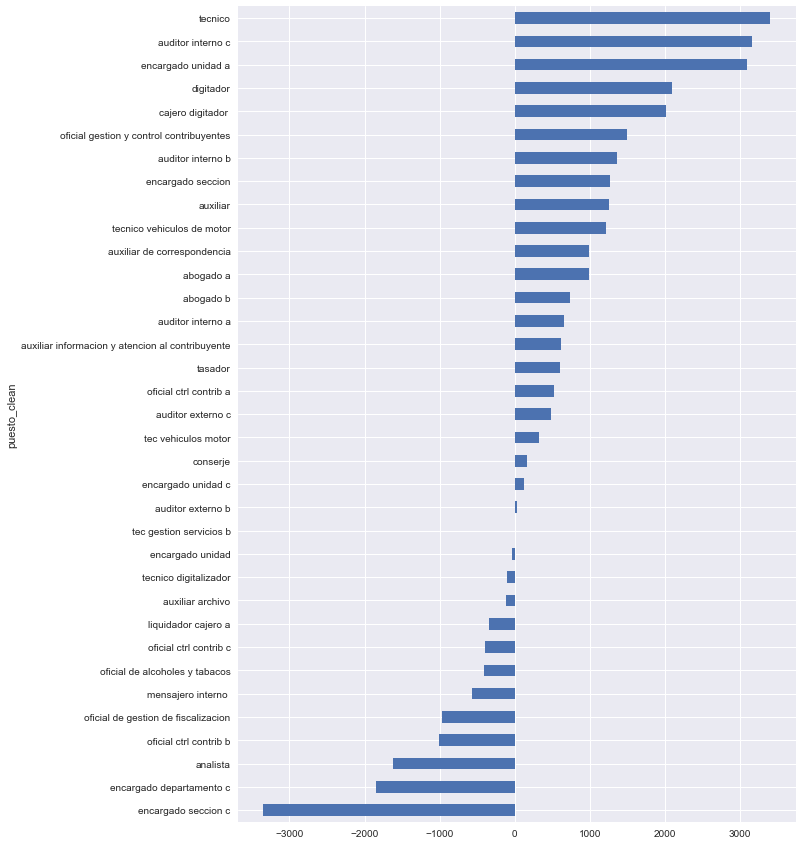

In [63]:
spg_diff_pivot = spg_mean_pivot.apply(lambda x: x - x['M'], axis = 1)
spg_diff_pivot.sort_values('F',inplace=True)
spg_diff_pivot['F'].plot(kind='barh',figsize=(10,15))

### En terminos relativos (%)?

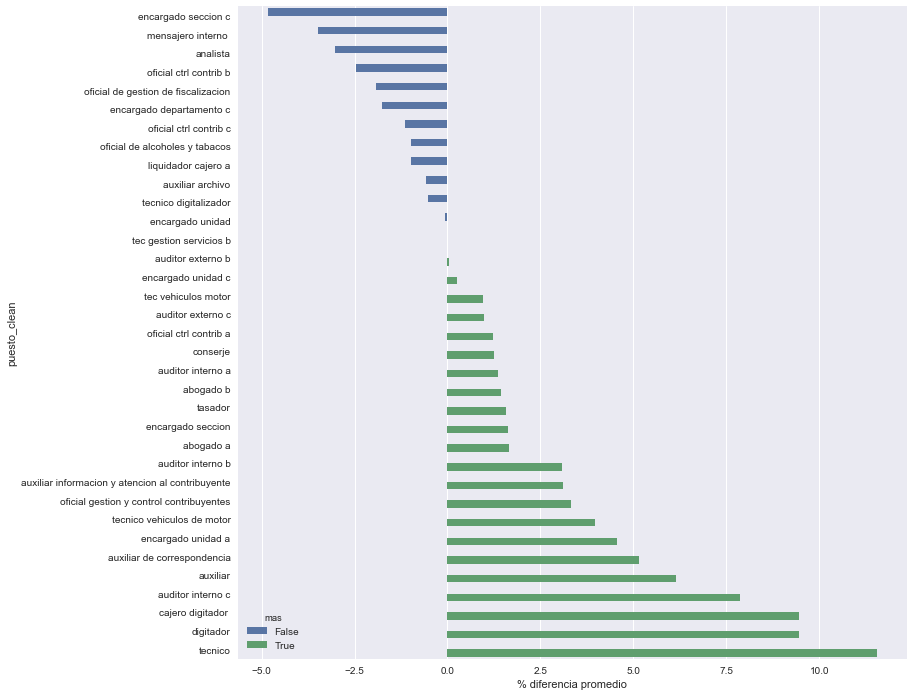

In [64]:
spg_rel_pivot = spg_mean_pivot.apply(lambda x: (x/x['M'] - 1) * 100, axis=1)
spg_rel_pivot['mas'] = spg_diff_pivot.F.map(lambda x: x > 0)
spg_rel_pivot.sort_values('F',inplace=True)
f = plt.figure(figsize=(12,12))
ax = sns.barplot(data=spg_rel_pivot,y=spg_rel_pivot.index,x='F',hue='mas',orient='h')
ax.set_xlabel('% diferencia promedio')

In [73]:
print("En {:d} de {:d} puestos el salario promedio de las mujeres es mayor que el de los hombres".format(spg_rel_pivot.mas.sum(), spg_rel_pivot.shape[0]))

En 22 de 35 puestos el salario promedio de las mujeres es mayor que el de los hombres


# Pendientes
----

* Resumen de valores en letras (letter value summary)
* Diagrama de cuantiles (quantile plots)
* Pruebas de hipotesis\
* ???


### Resumen en letras

Comparar grupos y distribuciones es complicado. Aquí no exploramos puntos como:

* diferencia de tamaño de los grupos
* valores extremos y su impacto en las medidas de centralidad y dispersión (media y desviación)
* debilidades del resumen de 7 números y los diagramas de caja (box & whiskers)

El resumen en letras se basa en la mediana de sucesivas división de los datos ordenados y resulta bastante útil para resaltar los sesgos (skew) que pueden tener los datos en una dirección u otra.

![letter value summary](http://mgimond.github.io/ES218/img/letter_value_summary_b.png)


### Diagramas de cuantiles

![quantile plot](http://mgimond.github.io/ES218/img/Quantile.png)




### Pruebas de hipotesis or _How I learned to stop worrying and love the p-value_

Todo muy chulo y bonito, pero podemos inferir algo?

Bueno, _si y no_.

**_No_** podemos inferir nada concreto en términos generales sobre la "brecha salarial de género" ya que los datos que tenemos son solo de dos meses en _una_ institución. Ni con todos los trucos, artimañas y librerías del mundo podemos escapar el simple hecho de que no tenemos datos sobre la población en general.

**_Si_** podemos hablar bastante sobre los salarios y la "brecha" en esta institución en particular hasta el momento donde tenemos datos (Ene-Feb 2016), **ya lo hemos hecho.**

# GRACIAS!

### Preguntas?